In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Reshape,BatchNormalization

In [2]:
(x_train, y_train), (x_test, y_test) =tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [4]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

5

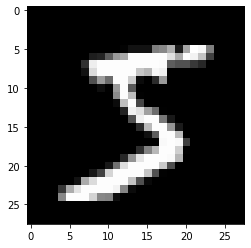

In [7]:
plt.imshow(x_train[0],cmap="gray")

In [8]:
x_train.dtype

dtype('uint8')

In [9]:
y_train.dtype

dtype('uint8')

In [10]:
x_train=x_train.astype("float32")
y_train=y_train.astype("float32")
x_test=x_test.astype("float32")
y_test=y_test.astype("float32")

In [11]:
x_train.dtype

dtype('float32')

In [12]:
type(x_train)

numpy.ndarray

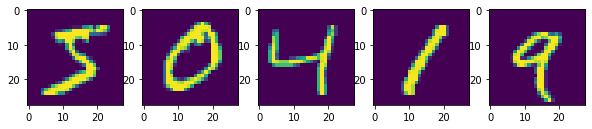

array([5., 0., 4., 1., 9.], dtype=float32)

In [13]:
plt.figure(figsize=(10,20))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(x_train[i])

plt.show()
y_train[0:5]

In [14]:
classes=np.unique(y_train).size
classes

10

In [15]:
y_train=np_utils.to_categorical(y_train,num_classes=classes)
y_test=np_utils.to_categorical(y_test,num_classes=classes)

In [16]:
y_train.shape

(60000, 10)

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
tf.keras.backend.clear_session()
model=Sequential()

model.add(Reshape((784,),input_shape=(28,28,)))
model.add(BatchNormalization())
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(60,activation="sigmoid"))
model.add(Dense(30,activation="sigmoid"))
model.add(Dense(10,activation="softmax"))
model.compile(optimizer="adam",metrics=["accuracy"],loss="categorical_crossentropy")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total params: 89,836
Trainable params: 88,268
Non-trainable params: 1,568
________________________________________________

In [19]:
model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test),batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 9s 3ms/step - loss: 0.6134 - accuracy: 0.8621 - val_loss: 0.2248 - val_accuracy: 0.9419
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1936 - accuracy: 0.9454 - val_loss: 0.1483 - val_accuracy: 0.9584
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1317 - accuracy: 0.9615 - val_loss: 0.1288 - val_accuracy: 0.9643
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1050 - accuracy: 0.9688 - val_loss: 0.1192 - val_accuracy: 0.9646
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0901 - accuracy: 0.9734 - val_loss: 0.1126 - val_accuracy: 0.9671
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0797 - accuracy: 0.9750 - val_loss: 0.1201 - val_accuracy: 0.9658
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0686 - accuracy: 0.9788 - val_loss: 0.1284 - val_accuracy:

In [20]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1423 - accuracy: 0.9672


[0.14234799146652222, 0.967199981212616]

In [21]:
y_pred=model.predict(x_test)
y_pred

array([[9.5706719e-07, 1.2306478e-07, 1.0543941e-05, ..., 9.9993694e-01,
        3.1339662e-06, 3.9067152e-05],
       [2.5947829e-05, 2.5695312e-04, 9.9931633e-01, ..., 8.0921345e-06,
        3.2915552e-06, 1.1254187e-08],
       [2.5685604e-06, 9.9993777e-01, 2.9869127e-05, ..., 3.3019489e-06,
        7.6093949e-07, 2.7870652e-07],
       ...,
       [8.0534832e-08, 3.6545302e-06, 3.3488436e-07, ..., 1.6658490e-05,
        3.2696635e-06, 2.9845530e-04],
       [9.2235714e-06, 2.8720901e-06, 1.7009156e-04, ..., 9.6212925e-06,
        5.2935211e-04, 1.6133050e-07],
       [1.3477766e-05, 2.1318343e-07, 1.1086883e-06, ..., 9.1627292e-09,
        1.1347025e-05, 3.0928017e-08]], dtype=float32)

In [22]:
y_pred[0]

array([9.5706719e-07, 1.2306478e-07, 1.0543941e-05, 3.1090615e-06,
       5.3793074e-06, 6.8051452e-07, 2.0440671e-10, 9.9993694e-01,
       3.1339662e-06, 3.9067152e-05], dtype=float32)

In [23]:
np.argmax(y_pred[0])

7

In [24]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [25]:
np.argmax(y_test[0])

7

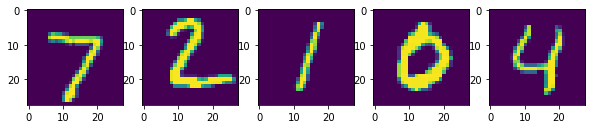

Actual values:  [7, 2, 1, 0, 4]
Predicted values:  [7, 2, 1, 0, 4]


In [26]:
my_prediction=[]
actual_prediction=[]
plt.figure(figsize=(10,20))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(x_test[i])
  my_prediction.append(np.argmax(y_pred[i]))
  actual_prediction.append(np.argmax(y_test[i]))

plt.show()
print("Actual values: ",actual_prediction)
print("Predicted values: ",my_prediction)